<a href="https://colab.research.google.com/github/jordipozo/CEIABD/blob/main/PIPELINE_HUGGING_FACE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# USO DE PIPELINES EN HUGGING FACE

Los ***pipelines*** son una forma estupenda y sencilla de utilizar modelos para la inferencia. Estas canalizaciones son objetos que abstraen la mayor parte del código complejo de la biblioteca, ofreciendo una API sencilla dedicada a varias tareas, como el *reconocimiento de entidades con nombre*, el *modelado de lenguaje enmascarado*, el *análisis de sentimiento*, la *extracción de características* y la *respuesta a preguntas*.

Es necesario, en la mayoría de los casos, usar un entorno de ejecución con **GPU**.

Hay dos categorías de abstracciones de *pipelines*:



* El **pipeline**, que es el objeto más potente que encapsula todos los **pipelines**.
* Otros **pipelines** para tareas específicas, como *NerPipeline* o *QuestionAnsweringPipeline*.

Los ***pipelines*** están formados por:


* Una instancia Tokenizer encargada de asignar la entrada textual sin procesar a tokens (tokenización).
* Una instancia de modelo.
* Postprocesamiento (opcional) para optimizar la salida del modelo.


Referencia: [Hugging Face Docs - Main classes](https://huggingface.co/transformers/v2.9.1/main_classes/pipelines.html)

In [3]:
!pip install transformers

In [10]:
from huggingface_hub import notebook_login

notebook_login()

In [13]:
!pip install huggingface_hub

In [15]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) Y
Token is valid (permission: read).

In [ ]:
from transformers import pipeline

In [4]:
import transformers

## Análisis de sentimientos

In [ ]:
nlp_sentiment_analysis = pipeline("sentiment-analysis")
text_sentiment = "We are very sad to include pipeline into the transformers repository"
nlp_sentiment_analysis(text_sentiment)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'NEGATIVE', 'score': 0.9994685053825378}]

## Pregunta - Respuesta

In [ ]:
nlp_qa = pipeline("question-answering")
context = "Jim is a new consultant in Google labs since past January"
question = "How long Jim has worked at Google labs?"
nlp_qa({
    'question': question,
    'context': context
})

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


{'score': 0.6414128541946411,
 'start': 39,
 'end': 57,
 'answer': 'since past January'}

### Varias preguntas sobre un mismo texto

In [ ]:
from transformers import pipeline

# Cargar el pipeline para la tarea de pregunta-respuesta
qa_pipeline = pipeline("question-answering", model="MMG/bert-base-spanish-wwm-cased-finetuned-spa-squad2-es-finetuned-sqac")



In [ ]:
# Definir el contexto y las preguntas

text = r"""
El texto científico es aquel que presenta el desarrollo de una investigación o que aborda conocimientos propios de algún área de la ciencia e incorpora resultados, pruebas y argumentos para sustentarlos.
Por ejemplo: El origen de las especies, de Charles Darwin.
El texto científico tiene como objetivo principal transmitir conocimientos de manera rigurosa, por eso para elaborar las hipótesis y teorías que expone, utiliza el método científico. Asimismo, suele presentar un lenguaje técnico, formal y objetivo, ya que es un tipo de texto informativo, que además está destinado a un público con determinada formación en un campo particular de la ciencia.
"""

questions = [
    "Qué presenta o aborda el texto científico?",
    "Cuál es el objetivo principal del texto científico?",
    "Qué tipo de lenguaje suele presentar el texto científico?",
]


In [ ]:
# Procesar cada pregunta
for question in questions:
    result = qa_pipeline(question=question, context=text)
    print(f"Question: {question}")
    print(f"Answer: {result['answer']}\n")

Question: Qué presenta o aborda el texto científico?
Answer: el desarrollo de una investigación

Question: Cuál es el objetivo principal del texto científico?
Answer: transmitir conocimientos de manera rigurosa

Question: Qué tipo de lenguaje suele presentar el texto científico?
Answer: técnico, formal y objetivo



## Relleno de huecos

In [ ]:

unmasker = pipeline('fill-mask', model='bert-base-multilingual-cased')

unmasker("El lenguaje científico [MASK] transmitir conocimiento de un determinado campo de la ciencia.")

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

[{'score': 0.26443830132484436,
  'token': 10196,
  'token_str': 'es',
  'sequence': 'El lenguaje científico es transmitir conocimiento de un determinado campo de la ciencia.'},
 {'score': 0.1583421379327774,
  'token': 12994,
  'token_str': 'puede',
  'sequence': 'El lenguaje científico puede transmitir conocimiento de un determinado campo de la ciencia.'},
 {'score': 0.14354655146598816,
  'token': 10220,
  'token_str': 'para',
  'sequence': 'El lenguaje científico para transmitir conocimiento de un determinado campo de la ciencia.'},
 {'score': 0.07797854393720627,
  'token': 22889,
  'token_str': 'permite',
  'sequence': 'El lenguaje científico permite transmitir conocimiento de un determinado campo de la ciencia.'},
 {'score': 0.05069691687822342,
  'token': 54134,
  'token_str': 'implica',
  'sequence': 'El lenguaje científico implica transmitir conocimiento de un determinado campo de la ciencia.'}]

## Named Entity Recognition

In [ ]:
nlp = pipeline("ner")
text_ner = "European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices"
nlp(text_ner)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'entity': 'I-MISC',
  'score': 0.9980934,
  'index': 1,
  'word': 'European',
  'start': 0,
  'end': 8},
 {'entity': 'I-ORG',
  'score': 0.9990614,
  'index': 4,
  'word': 'Google',
  'start': 27,
  'end': 33}]

## Sumarización - Resumen de textos

In [ ]:
from transformers import pipeline

summarizer = pipeline("summarization", model="ELiRF/mt5-base-dacsa-es")


config.json:   0%|          | 0.00/1.11k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.33G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/425 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:560: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


In [ ]:
texto="""
La Universitat Politècnica de València (UPV), a través del
proyecto Atenea “plataforma de mujeres, arte y tecnología” y en colaboración
con las compañías tecnológicas Metric Salad y Zetalab, ha digitalizado y
modelado en 3D para la 35ª edición del Festival Dansa València, que se celebra
del 2 al 10 de abril, la primera pieza de danza en un metaverso específico.La
pieza No es amor, dirigida por Lara Misó, forma parte de la programación de
esta edición del Festival Dansa València y explora la figura geométrica del
círculo desde todas sus perspectivas: espacial, corporal y compositiva. No es
amor está inspirada en el trabajo de la artista japonesa Yayoi Kusama y mira de
cerca las diferentes facetas de una obsesión. Así da cabida a la insistencia,
la repetición, el trastorno, la hipnosis y la liberación. El proceso de
digitalización, materializado por Metric Salad y ZetaLab, ha sido complejo
respecto a otros ya realizados debido al enorme desafío que conlleva el
modelado en 3D de cuerpos en movimiento al ritmo de la composición de la obra.
El objetivo era generar una experiencia lo más realista posible y fidedigna de
la original para que el resultado final fuera un proceso absolutamente
inmersivo. Así, el metaverso está compuesto por figuras modeladas en 3D junto a
cuatro proyecciones digitalizadas en pantallas flotantes con las que el usuario
podrá interactuar según se vaya acercando, bien mediante los comandos del
ordenador, bien a través de gafas de realidad virtual. El objetivo es que
cuando el usuario se acerque a cada una de las proyecciones tenga la sensación
de una inmersión casi completa al fundirse con el contenido audiovisual que le
genere una experiencia intimista y muy real.
"""
print(summarizer(texto,truncation=True))

[{'summary_text': 'La Universitat Politècnica de València ha digitalizado y modelado en 3D para la 35a edición del Festival Dansa València, que se celebra del 2 al 10 de abril.'}]


## Traducción de texto

In [ ]:
! pip install ctranslate2 sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.4/179.4 MB 5.7 MB/s eta 0:00:00


In [ ]:
import ctranslate2
from sentencepiece import SentencePieceProcessor
from huggingface_hub import snapshot_download

model_name = "santhosh/madlad400-3b-ct2"
model_path = snapshot_download(model_name)

tokenizer = SentencePieceProcessor()
tokenizer.load(f"{model_path}/sentencepiece.model")
translator = ctranslate2.Translator(model_path)

Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
input_text = "I love pizza!"
target_language = "es"
input_tokens = tokenizer.encode(f"<2{target_language}> {input_text}", out_type=str)
results = translator.translate_batch(
    [input_tokens],
    batch_type="tokens",
    max_batch_size=1024,
    beam_size=1,
    no_repeat_ngram_size=1,
    repetition_penalty=2,
)
translated_sentence = tokenizer.decode(results[0].hypotheses[0])
print(translated_sentence)

¡Me encanta la pizza!


## Generación automática de texto

In [1]:
import tensorflow as tf
from transformers import TFGPT2LMHeadModel, GPT2Tokenizer


tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# add the EOS token as PAD token to avoid warnings
model = TFGPT2LMHeadModel.from_pretrained("gpt2", pad_token_id=tokenizer.eos_token_id)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFGPT2LMHeadModel.

All the weights of TFGPT2LMHeadModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.


***Búsqueda codiciosa (Greedy Search)***.  
La búsqueda codiciosa simplemente selecciona la palabra con mayor probabilidad como siguiente palabra:
$\ w_t = argmax_{w}P(w | w_{1:t-1})$
 en cada paso temporal.  
El siguiente esquema muestra la búsqueda codiciosa.

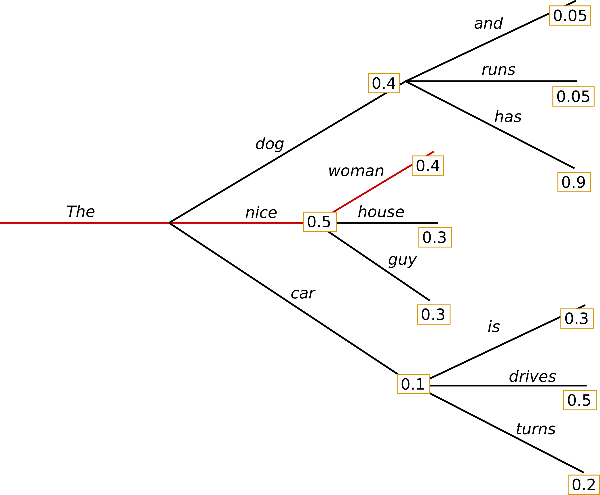

A continuación generaremos secuencias de palabras utilizando GPT2 como modelo:

In [15]:
# encode context the generation is conditioned on
input_ids = tokenizer.encode('I love to have coffee and toast for breakfast.', return_tensors='tf')

# generate text until the output length (which includes the context length) reaches 50
greedy_output = model.generate(input_ids, max_length=50)

print("Output:\n" + 100 * '-')
print(tokenizer.decode(greedy_output[0], skip_special_tokens=True))

Output:
----------------------------------------------------------------------------------------------------
I love to have coffee and toast for breakfast. I love to have a good meal and a good night's sleep. I love to have a good night's sleep. I love to have a good night's sleep. I love to have a good


Se ha generado nuestro primer texto corto con GPT2. Las palabras generadas siguiendo el contexto son razonables, ¡pero el modelo rápidamente empieza a repetirse!  
Este es un problema muy común en la generación de lenguaje en general y parece ser aún más en la búsqueda codiciosa y de haz.  
Sin embargo, el mayor inconveniente de la búsqueda codiciosa es que pasa por alto palabras de alta probabilidad ocultas tras una palabra de baja probabilidad, como puede verse en nuestro esquema anterior.

***Búsqueda por haces (Beam Search)***:  

La búsqueda por haces reduce el riesgo de omitir secuencias de palabras ocultas de alta probabilidad manteniendo el número de haces de hipótesis más probables en cada paso de tiempo y eligiendo finalmente la hipótesis que tenga la probabilidad global más alta.  


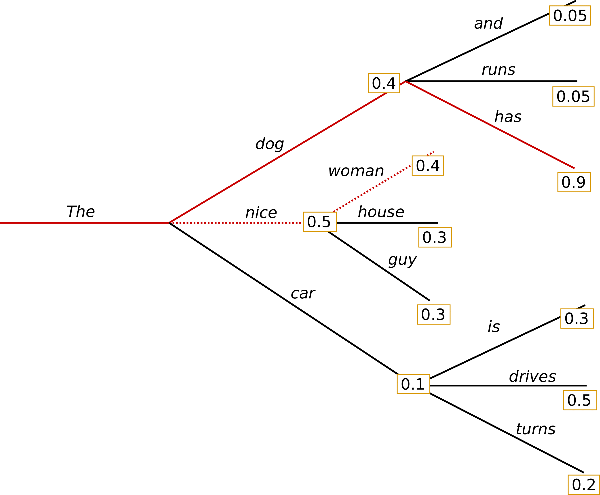

En el paso 1, además de la hipótesis más probable "The", "nice", la búsqueda por haz también realiza un seguimiento de la segunda hipótesis más probable "The", "dog".  
En el paso 2, la búsqueda por haz encuentra que la secuencia de palabras "The", "dog", "has" con 0,36, una probabilidad mayor que "The", "nice", "woman", que tiene 0,2.   
Por tanto, ha encontrado la secuencia de palabras más probable en este ejemplo.


La búsqueda por haz (beam search) siempre encontrará una secuencia de salida con mayor probabilidad que la búsqueda codiciosa (greedy search), pero no garantiza que encuentre la salida más probable.

In [16]:
# activate beam search and early_stopping
beam_output = model.generate(
    input_ids,
    max_length=50,
    num_beams=5,
    early_stopping=True
)

print("Output:\n" + 100 * '-')
print(tokenizer.decode(beam_output[0], skip_special_tokens=True))

Output:
----------------------------------------------------------------------------------------------------
I love to have coffee and toast for breakfast.

I love to have coffee and toast for breakfast.

I love to have coffee and toast for breakfast.

I love to have coffee and toast for breakfast.

I love


Aunque el resultado es posiblemente más fluido, sigue habiendo repeticiones de las mismas secuencias de palabras.  

Un remedio sencillo es introducir *penalizaciones por n-gramas* (también conocidas como secuencias de palabras de 'n' palabras).   
La *penalización de n-gramas* más común se asegura de que ningún n-grama aparezca dos veces estableciendo manualmente la probabilidad de las siguientes palabras que podrían crear un n-grama ya visto a 0.  
A continuación se establece no_repeat_ngram_size=2 para que ningún 2-grama aparezca 2 veces:

In [17]:
# set no_repeat_ngram_size to 2
beam_output = model.generate(
    input_ids,
    max_length=50,
    num_beams=5,
    no_repeat_ngram_size=2,
    early_stopping=True
)

print("Output:\n" + 100 * '-')
print(tokenizer.decode(beam_output[0], skip_special_tokens=True))

Output:
----------------------------------------------------------------------------------------------------
I love to have coffee and toast for breakfast. It's a great way to start your day.

If you have any questions or comments, feel free to leave them in the comment section below.


Se puede ver que la repetición ya no aparece. No obstante, las penalizaciones de n-gramas deben utilizarse con cuidado.   
Por ejemplo: en un artículo generado sobre la ciudad de Nueva York no debería utilizar una penalización de 2gramas, ya que, de lo contrario, ¡el nombre de la ciudad sólo aparecería una vez en todo el texto!  

Otra característica importante de la búsqueda de haces es que es posible comparar los mejores haces tras la generación y elegir el haz generado que mejor se adapte a nuestro propósito.   

En la librería `transformers`, basta con establecer el parámetro `num_return_sequences` en el número de haces de mayor puntuación que deben devolverse. (El parámetro `num_return_sequences <= num_beams`)

In [19]:
# set return_num_sequences > 1
beam_outputs = model.generate(
    input_ids,
    max_length=50,
    num_beams=7,
    no_repeat_ngram_size=2,
    num_return_sequences=5,
    early_stopping=True
)

print("Output:\n" + 100 * '-')
for i, beam_output in enumerate(beam_outputs):
  print("{}: {}".format(i, tokenizer.decode(beam_output, skip_special_tokens=True)))

Output:
----------------------------------------------------------------------------------------------------
0: I love to have coffee and toast for breakfast. It's a great way to spend time with family and friends.

I also like to eat a lot of fruits and vegetables. I'm not a big fan of processed foods, but I like
1: I love to have coffee and toast for breakfast. It's a great way to spend time with family and friends.

I also like to eat a lot of fruits and vegetables. I'm not a big fan of processed foods, but I do
2: I love to have coffee and toast for breakfast. It's a great way to spend time with family and friends.

I also like to eat a lot of fruits and vegetables. I'm not a big fan of sugar, but I do like
3: I love to have coffee and toast for breakfast. It's a great way to spend time with family and friends.

I also like to eat a lot of fruits and vegetables. I'm not a huge fan of sugar, but I do like
4: I love to have coffee and toast for breakfast. It's a great way to spend ti